In [1]:
#Import the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
%matplotlib inline 


In [2]:
#load Json data to dataframe
json_text=open('ultimate_data_challenge.json','r')
df=pd.DataFrame(json.loads(json_text.read()))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
df.shape

(50000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
df.describe(include=['object'])

,city,last_trip_date,phone,signup_date
count,50000,50000,49604,50000
unique,3,182,2,31
top,Winterfell,2014-06-29,iPhone,2014-01-18
freq,23336,2036,34582,2948


# Preprocessing of data

In [7]:
# Change the column Data types in Required Format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
type(df['signup_date'][0]), type(df['last_trip_date'][0])

(pandas._libs.tslib.Timestamp, pandas._libs.tslib.Timestamp)

In [8]:
df[df['last_trip_date']-df['signup_date']> '150 days']['avg_dist'].count()

12198

In [9]:
df['longterm_user'] = 0
df.loc[df[df['last_trip_date']-df['signup_date']> '150 days'].index,'longterm_user'] = 1
df[df.longterm_user == 1]['avg_dist'].count()




12198

# Handling Missing values

avg_rating_by_driver and avg_rating_of_driver has null values which I filled using mean values.

In [10]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
longterm_user                0
dtype: int64

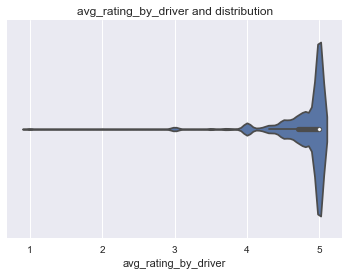

In [11]:
# View range and distribution
sns.violinplot(df.avg_rating_by_driver)
sns.plt.title('avg_rating_by_driver and distribution')

In [12]:
#fill the missing avg_rating_by_driver with mean value
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(), inplace=True)
df.avg_rating_by_driver.isnull().sum()

0

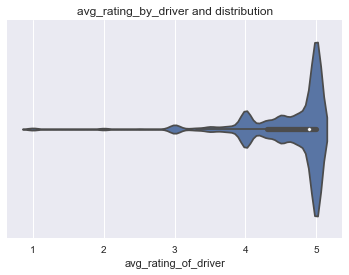

In [13]:
# View range and distribution
sns.violinplot(df.avg_rating_of_driver)
sns.plt.title('avg_rating_by_driver and distribution')

In [14]:
#fill the missing avg_rating_of_driver with mean value
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(), inplace=True)
df.avg_rating_of_driver.isnull().sum()

0

In [15]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

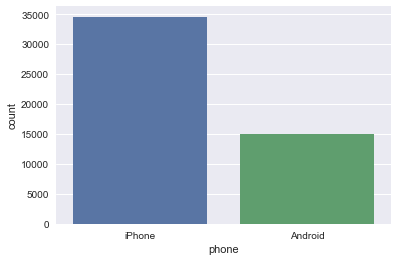

In [16]:
sns.countplot(df.phone)

In [17]:
df.phone.fillna('iPhone', inplace=True)
df.phone.isnull().sum()

0

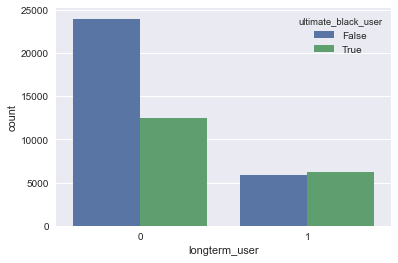

In [36]:
sns.countplot('longterm_user',hue='ultimate_black_user', data=df)

Ultimate black users are **potential long term rider**.

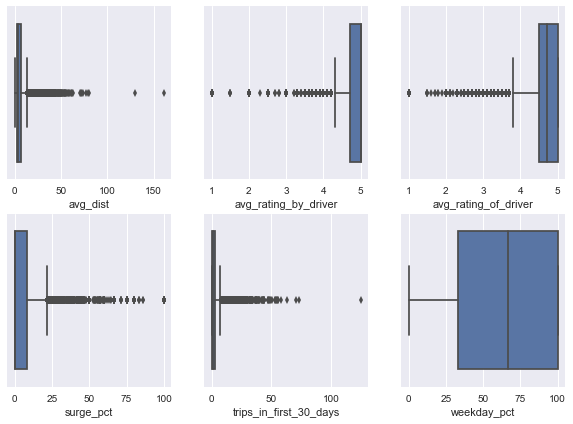

In [19]:
#Find evident outliers
fig , ax1 = plt.subplots(nrows=2, ncols=3,figsize=(10,7) )
sns.boxplot('avg_dist', data=df, ax=ax1[0,0])
sns.boxplot('avg_rating_by_driver', data=df, ax=ax1[0,1])
sns.boxplot('avg_rating_of_driver', data=df, ax=ax1[0,2])
sns.boxplot('surge_pct', data=df, ax=ax1[1,0])
sns.boxplot('trips_in_first_30_days',data=df, ax=ax1[1,1])
sns.boxplot('weekday_pct', data=df, ax=ax1[1,2])


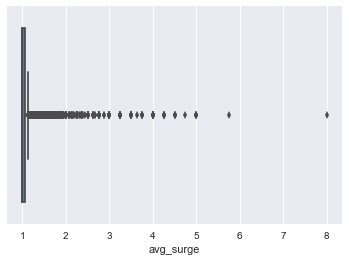

In [20]:
sns.boxplot('avg_surge', data=df)

In [21]:
df[df.avg_dist > 100]['avg_dist'].count()


2

In [22]:
df[df.trips_in_first_30_days > 100]['trips_in_first_30_days'].count()

1

In [23]:
df[df.surge_pct > 99]['surge_pct'].count()

1416

In [24]:
df = df.drop(df[df.trips_in_first_30_days > 100].index)
df = df.drop(df[df.avg_dist > 100].index)
df.shape

(49997, 13)

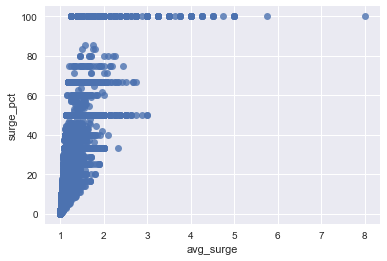

In [26]:
sns.regplot('avg_surge', 'surge_pct', data=df , fit_reg=False)

surge_pct=100 looks like wrong data our outliers. So, I will prefer to remove all those observations.

In [27]:
df = df.drop(df[df.surge_pct > 99].index)

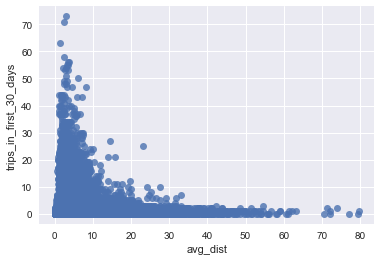

In [28]:
sns.regplot('avg_dist', 'trips_in_first_30_days', data=df , fit_reg=False)

I have **retained 47% of the data** and **removed 1419 observations** as part of the clean-up.

In [39]:
df.to_csv('ultimate_data_challenge_clean.csv',index=False)